In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('clustering.csv')
dataset.shape

(381, 13)

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
Loan_ID              381 non-null object
Gender               376 non-null object
Married              381 non-null object
Dependents           373 non-null object
Education            381 non-null object
Self_Employed        360 non-null object
ApplicantIncome      381 non-null int64
CoapplicantIncome    381 non-null float64
LoanAmount           381 non-null float64
Loan_Amount_Term     370 non-null float64
Credit_History       351 non-null float64
Property_Area        381 non-null object
Loan_Status          381 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


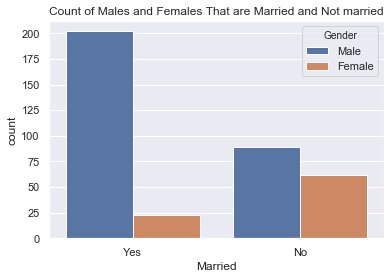

In [7]:
plt.title('Count of Males and Females That are Married and Not married')
sns.set(style = 'darkgrid')
sns.countplot(x = dataset['Married'], hue=dataset['Gender'])

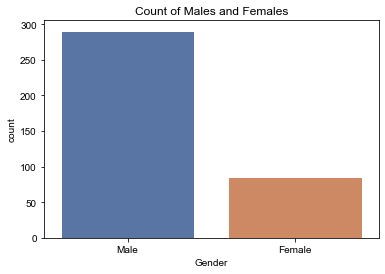

In [5]:
plt.title('Count of Males and Females')
sns.set(style = 'darkgrid')
sns.countplot(x = dataset['Gender'])

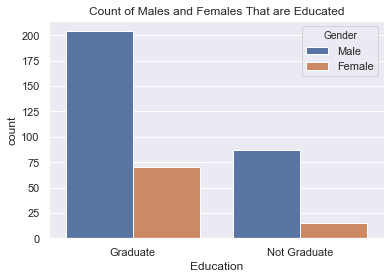

In [8]:
plt.title('Count of Males and Females That are Educated')
sns.set(style = 'darkgrid')
sns.countplot(x = dataset['Education'], hue=dataset['Gender'])

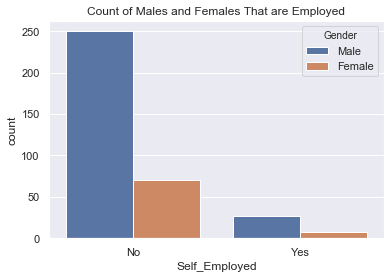

In [10]:
plt.title('Count of Males and Females That are Employed')
sns.set(style = 'darkgrid')
sns.countplot(x = dataset['Self_Employed'], hue=dataset['Gender'])

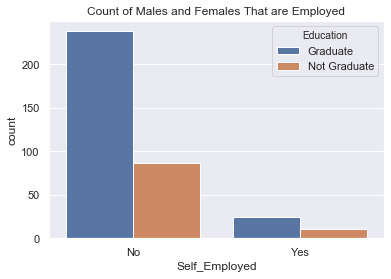

In [11]:
plt.title('Count of Males and Females That are Employed')
sns.set(style = 'darkgrid')
sns.countplot(x = dataset['Self_Employed'], hue=dataset['Education'])

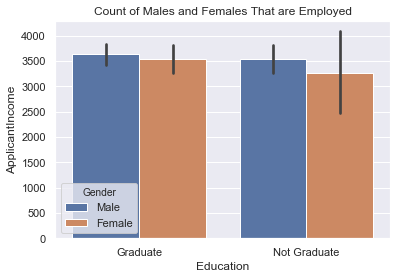

In [15]:
plt.title('Count of Males and Females That are Employed')
sns.set(style = 'darkgrid')
sns.barplot(y = dataset['ApplicantIncome'], x=dataset['Education'], hue=dataset['Gender'])

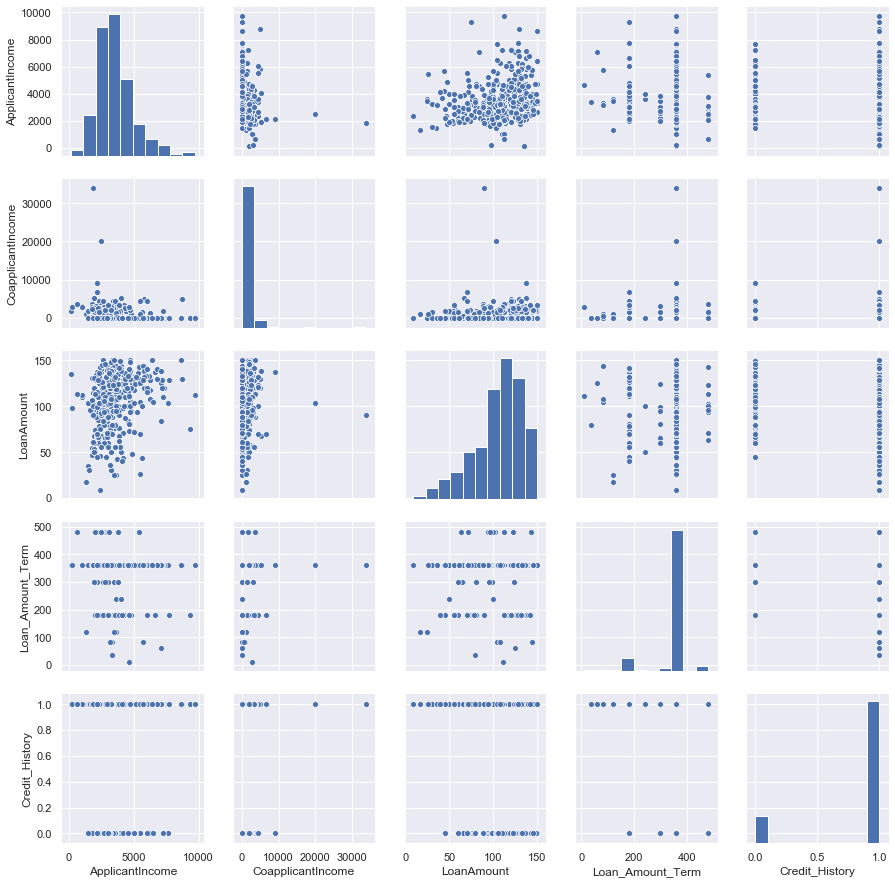

In [16]:
sns.pairplot(dataset.iloc[:,1:])

In [17]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [33]:
x = dataset.iloc[:,[6,8]]

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)

In [35]:
wcss

[766336682.7979002,
 291148680.62682676,
 151285948.9451614,
 93198687.75918041,
 65235996.78187132,
 47329456.85965783,
 36582671.886742145,
 26692868.763658524,
 19435735.396693833,
 15045836.962398712]

Text(0, 0.5, 'WCSS')

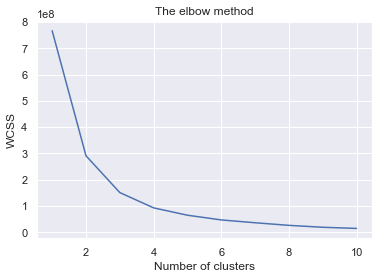

In [36]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [37]:
# Fitting Kmeans to the dataset and predicting the clusters 
Kmeans = KMeans(n_clusters =4, init = 'k-means++' , random_state = 0)
y_kmeans = Kmeans.fit_predict(x)

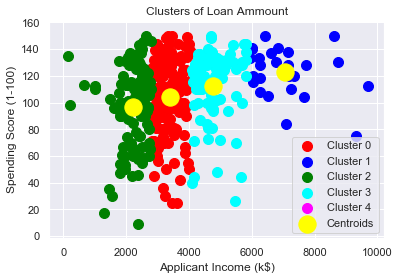

In [38]:
#unzip all values for all column in X DataFrame and store them in x(array)
x = x.values
    
# x[y_kmeans == 0, 0] is a conditional statement that prints the value of x[i] for all i in X, only if where y_kmeans ==0
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Loan Ammount')
plt.xlabel('Applicant Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend() #Show labels in all scatter plots as legend